# Data Cleaning
## Handling Outliers and Missing Values 

In [737]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from scipy.stats import pearsonr
import geopandas as gpd
import contextily as ctx

# Load dataset
housing_data = pd.read_csv("C:/Users/lasko/Documents/Bocconi/1st semester/Statistics and Probability/Final Report/stats-project/housing.csv")

# Visualize the dataset
housing_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [738]:
len(housing_data)

13580

## Detection of columns with missing data

In [739]:
missing_columns = housing_data.columns[housing_data.isnull().any()]
missing_columns_list = missing_columns.tolist()
missing_columns_list

['Car', 'BuildingArea', 'YearBuilt', 'CouncilArea']

## Detection of outliers

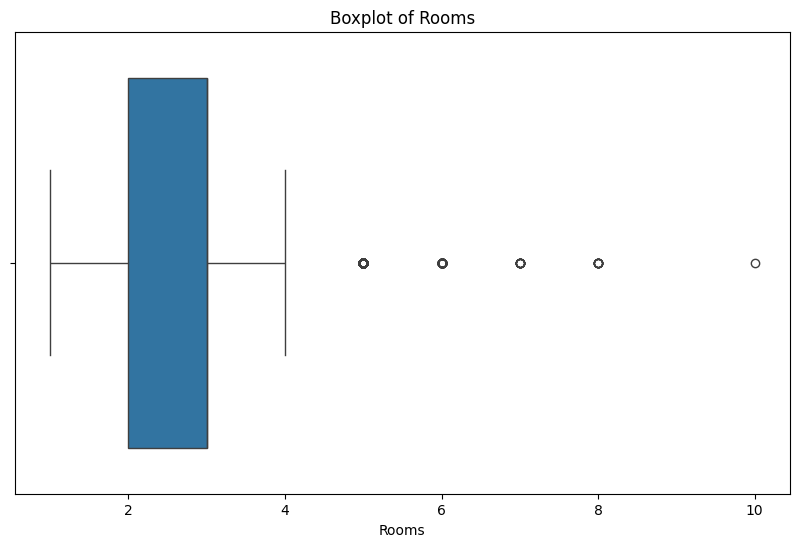

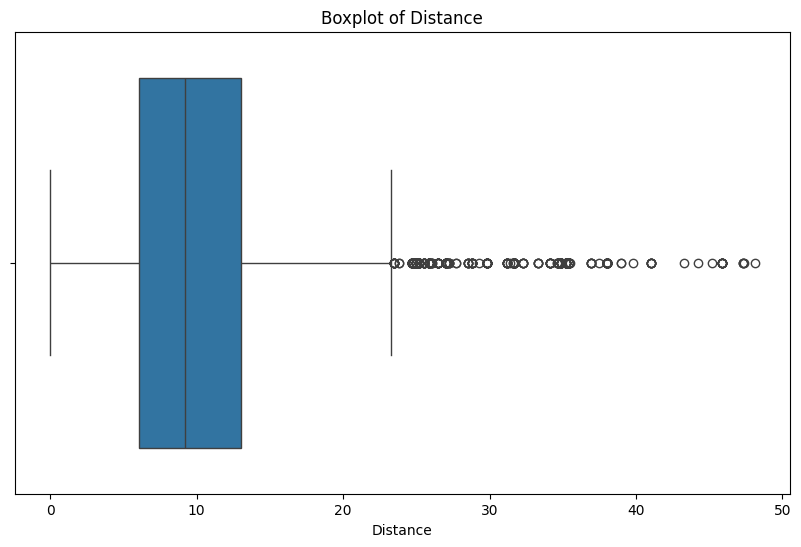

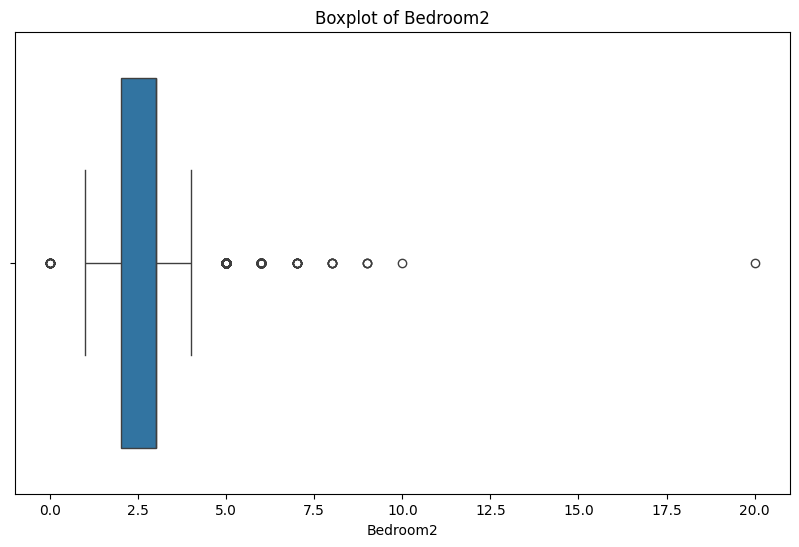

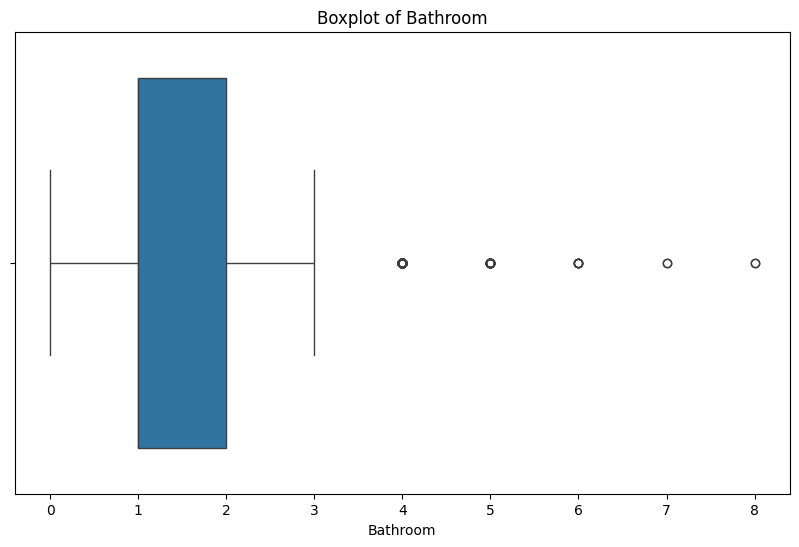

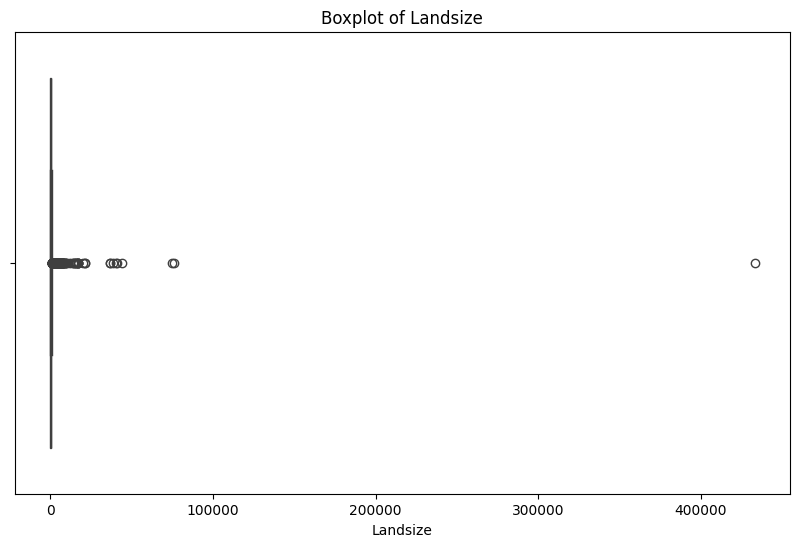

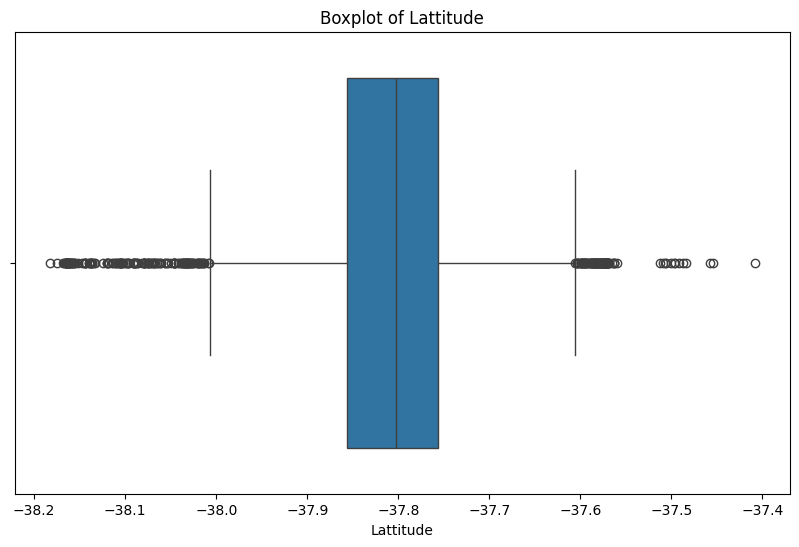

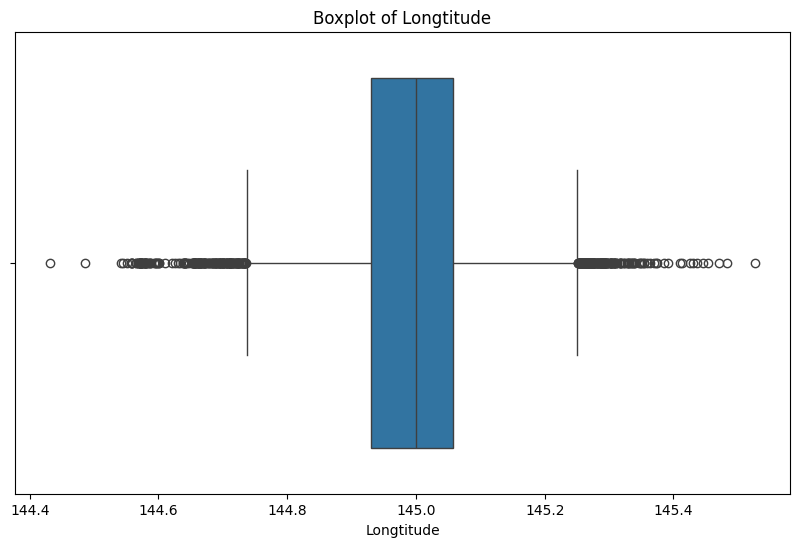

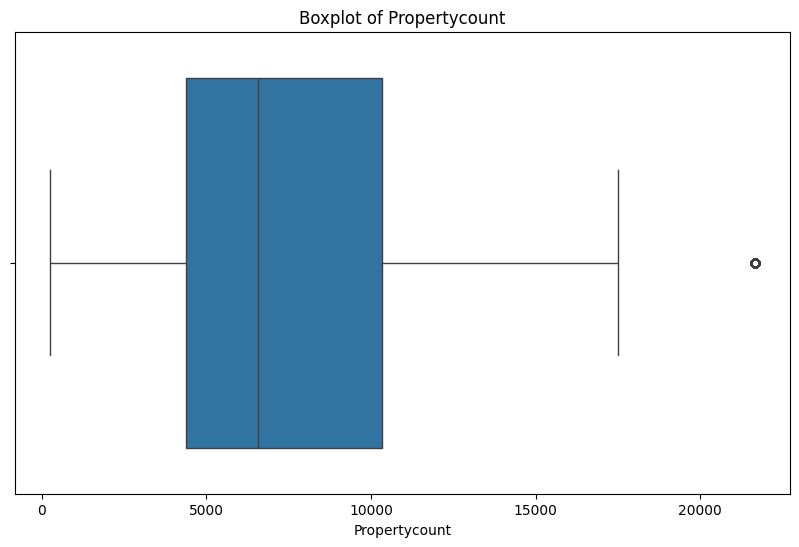

In [740]:
numeric_columns = housing_data.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    if column not in ['Price', 'Postcode', 'Car', 'BuildingArea', 'YearBuilt', 'Land_price_per_m2', 'Building_and_land_price_per_m2', 'YearSold']:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=housing_data, x=column)
        plt.title(f'Boxplot of {column}')
        plt.show()

Car

In [741]:
car_notna = housing_data[housing_data['Car'].notna()]

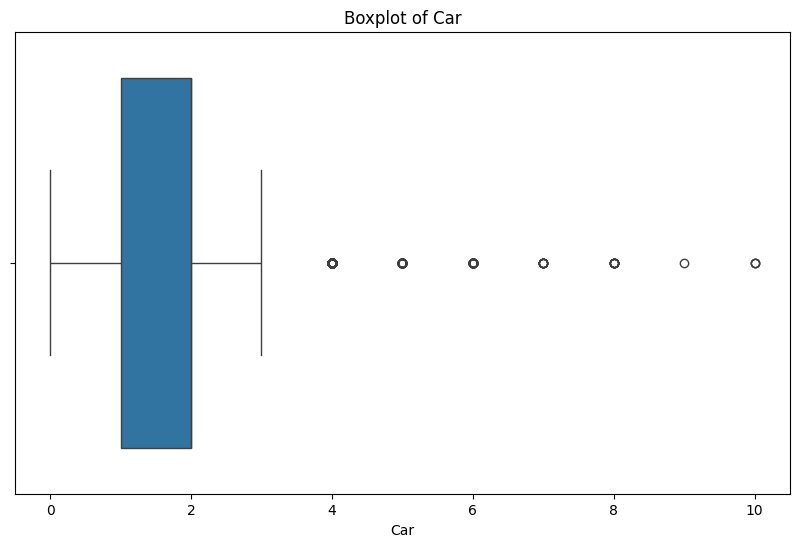

In [742]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=car_notna, x='Car')
plt.title(f'Boxplot of Car')
plt.show()

BuildingArea

In [743]:
building_area_notna = housing_data[housing_data['BuildingArea'].notna()]

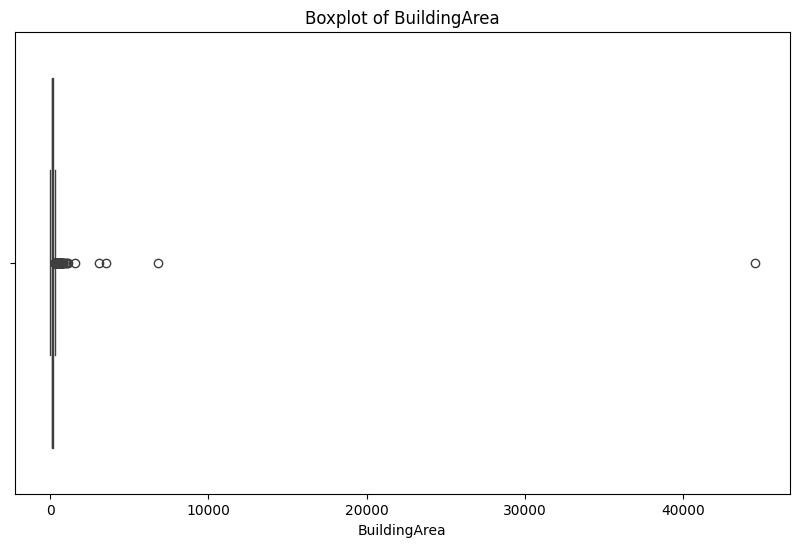

In [744]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=building_area_notna, x='BuildingArea')
plt.title(f'Boxplot of BuildingArea')
plt.show()

YearBuilt

In [745]:
year_built_notna = housing_data[housing_data['BuildingArea'].notna()]

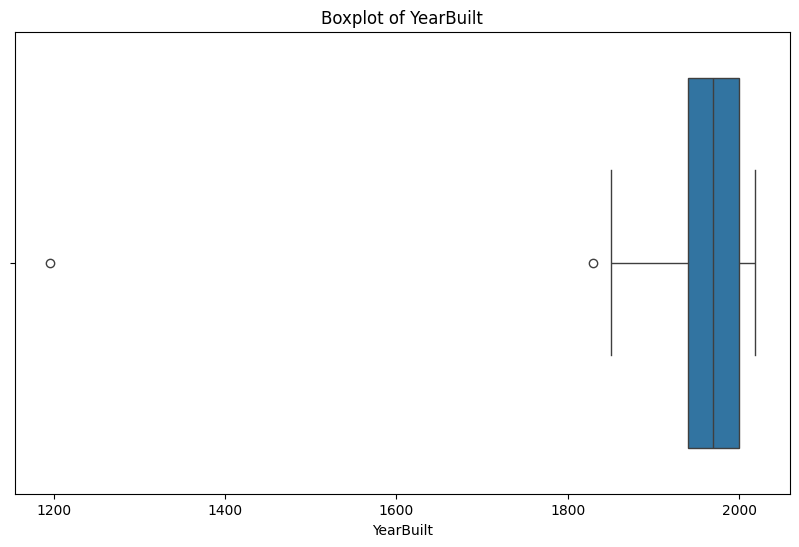

In [746]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=year_built_notna, x='YearBuilt')
plt.title(f'Boxplot of YearBuilt')
plt.show()

## Univariate Analysis

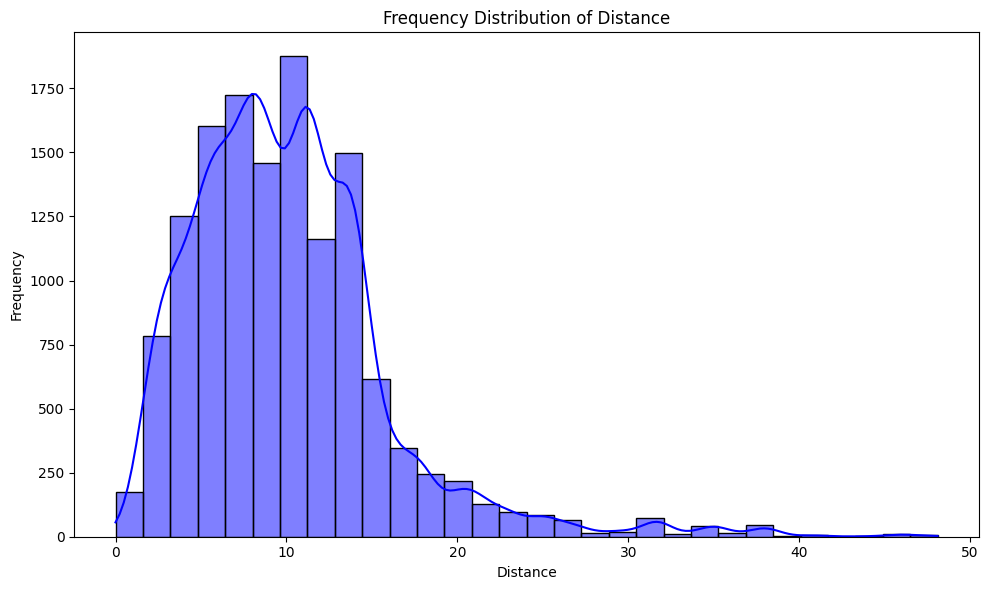

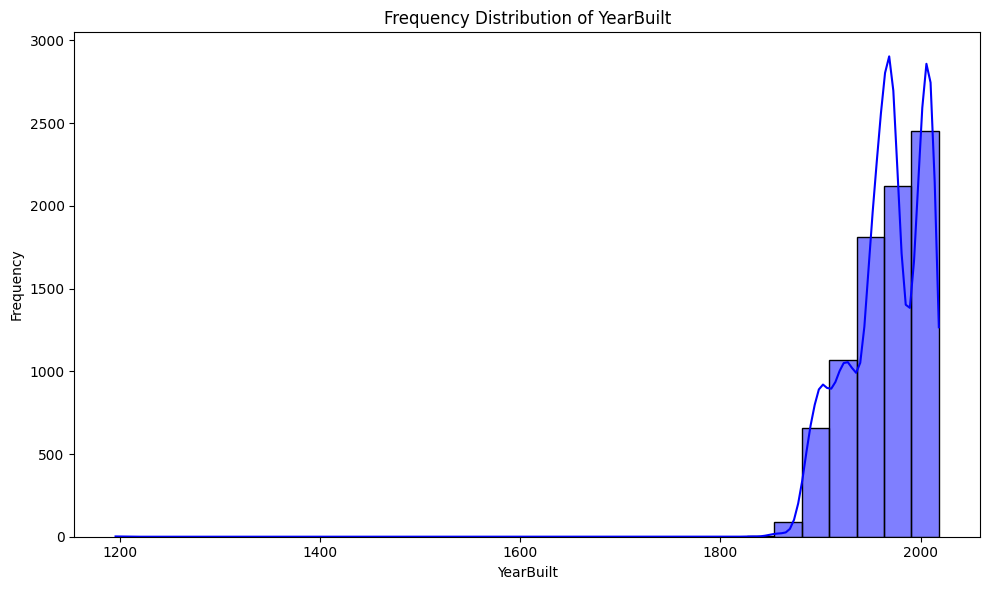

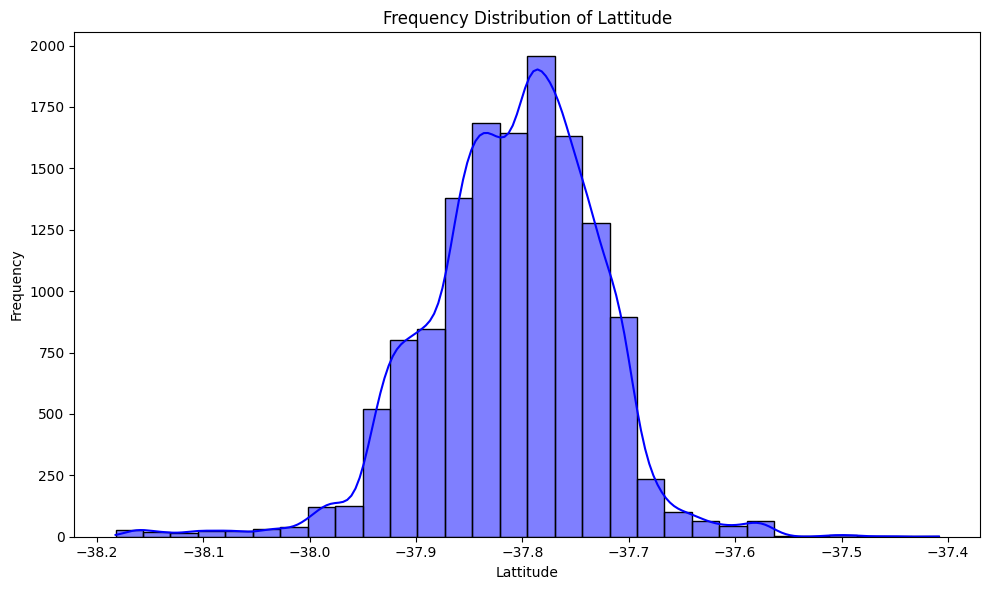

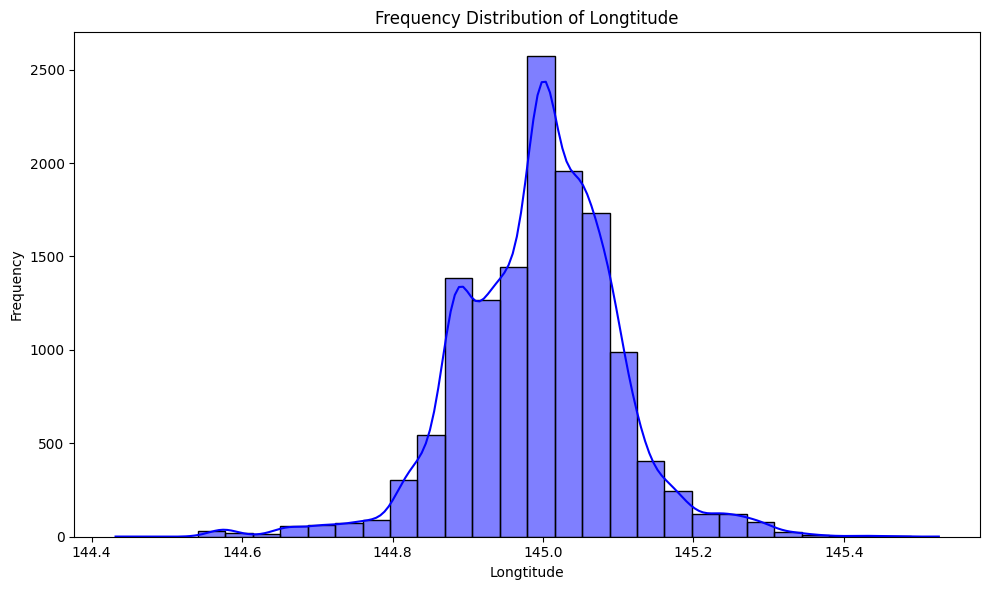

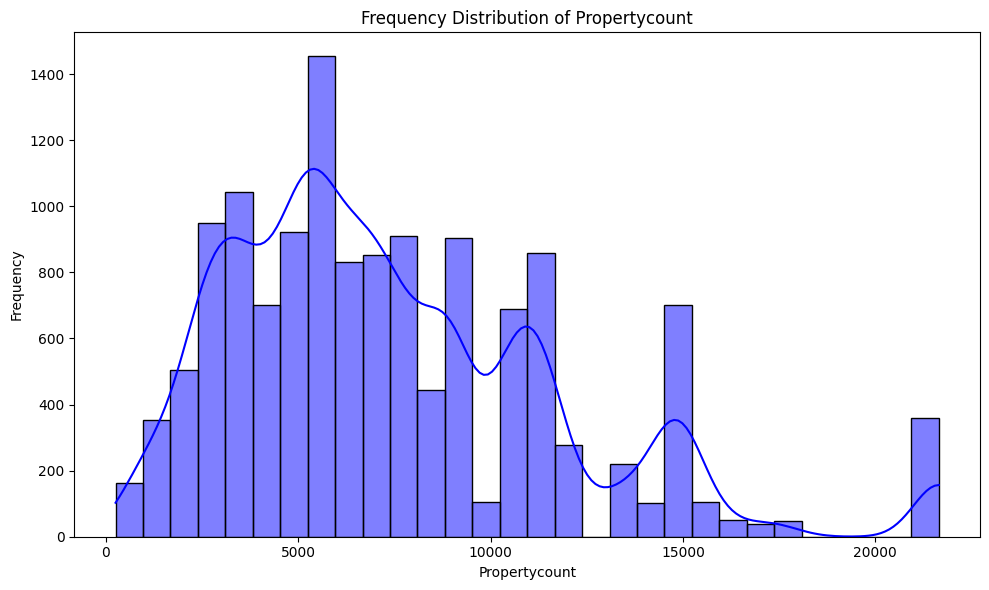

In [747]:
columns_to_plot = ['Distance', 'YearBuilt', 
                   'Lattitude', 'Longtitude', 'Propertycount']

# Create frequency distribution plots for each column
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=housing_data, x=column, kde=True, bins=30, color='blue')
    plt.title(f'Frequency Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

## Bivariate Analysis

Price vs Type of property

C:\Users\lasko\AppData\Local\Temp\ipykernel_27128\738839855.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=housing_data, x='Type', y='Price', palette='viridis')


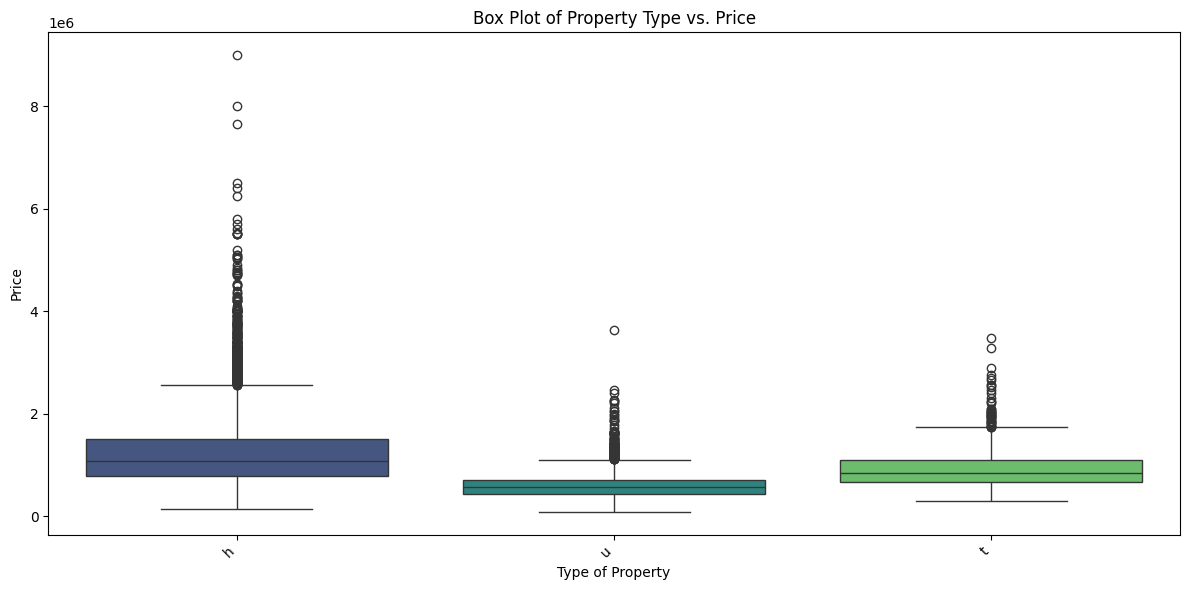

In [748]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=housing_data, x='Type', y='Price', palette='viridis')
plt.title('Box Plot of Property Type vs. Price')
plt.xlabel('Type of Property')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Price vs Method

C:\Users\lasko\AppData\Local\Temp\ipykernel_27128\3960210429.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=housing_data, x='Method', y='Price', palette='viridis')


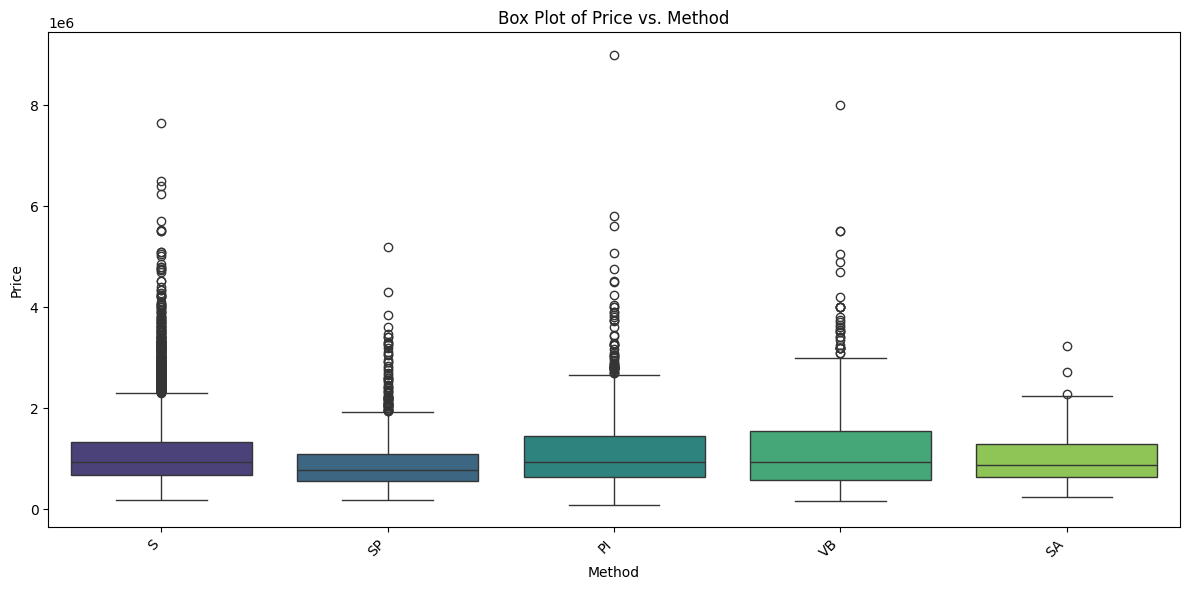

In [749]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=housing_data, x='Method', y='Price', palette='viridis')
plt.title('Box Plot of Price vs. Method')
plt.xlabel('Method')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Price vs Region Name

C:\Users\lasko\AppData\Local\Temp\ipykernel_27128\536752745.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=housing_data, x='Regionname', y='Price', palette='viridis')


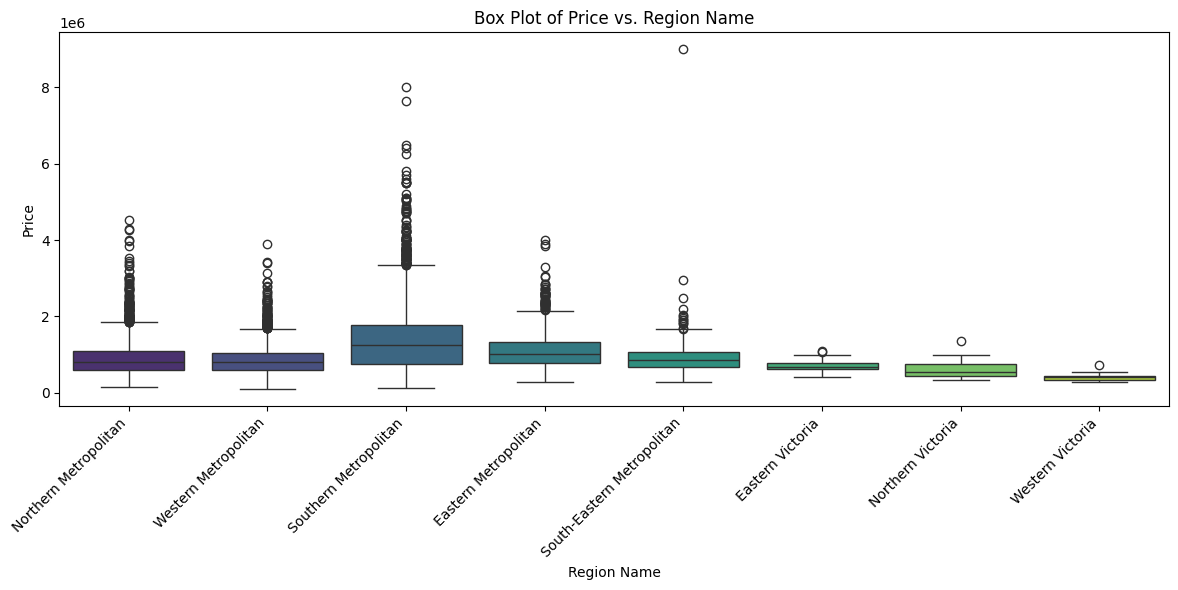

In [750]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=housing_data, x='Regionname', y='Price', palette='viridis')
plt.title('Box Plot of Price vs. Region Name')
plt.xlabel('Region Name')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Average Housing Prices by Region - **before data imputation**

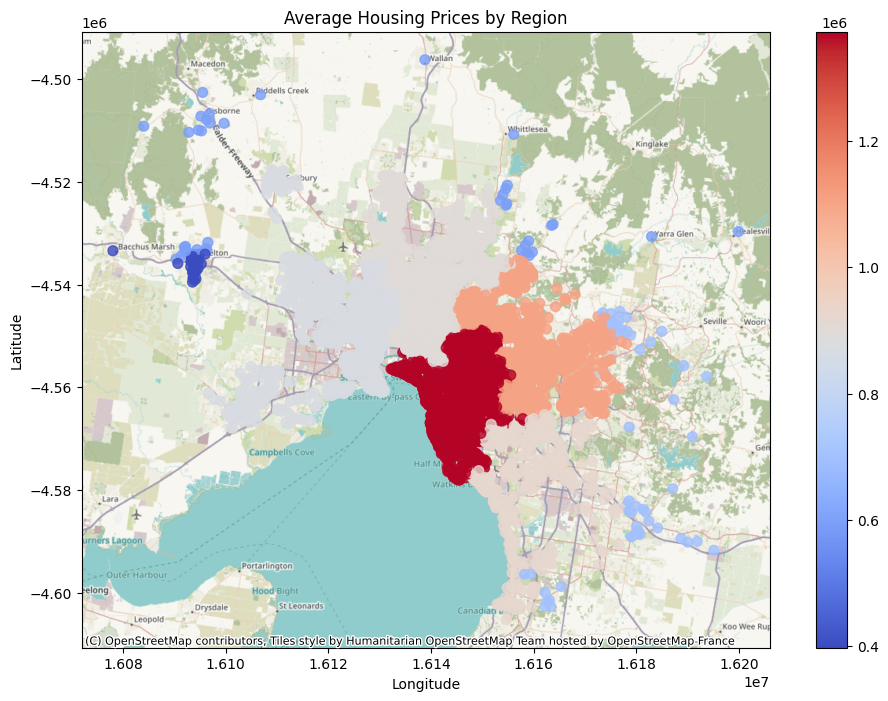

In [751]:
# Step 1: Drop rows with missing values for specified columns
filtered_data = housing_data.dropna(subset=['Price', 'Lattitude', 'Longtitude', 'Regionname'])

# Step 2: Calculate the average price per region
average_price_per_region = housing_data.groupby('Regionname')['Price'].mean().reset_index()

# Step 3: Merge the average prices back to include spatial data
region_geo = filtered_data[['Regionname', 'Lattitude', 'Longtitude']].drop_duplicates()
merged_data = region_geo.merge(average_price_per_region, on='Regionname')

# Step 4: Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(
    merged_data,
    geometry=gpd.points_from_xy(merged_data['Longtitude'], merged_data['Lattitude']),
    crs="EPSG:4326"  # WGS 84 Coordinate Reference System
)

# Ensure the GeoDataFrame has a CRS
gdf.set_crs(epsg=4326, inplace=True)  # Set CRS to WGS84
gdf = gdf.to_crs(epsg=3857)  # Reproject to Web Mercator (EPSG:3857)

# Step 5: Plot the data on a basemap
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax, column='Price', cmap='coolwarm', legend=True, markersize=50, alpha=0.8)

# Add basemap
ctx.add_basemap(ax, crs=gdf.crs)
plt.title("Average Housing Prices by Region")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Spatial Distribution of Property Prices in Equally Thick Rings from CBD - **before data imputation**

## Filtering outliers using upper and lower bound

In [752]:
def finding_outliers(data, column_name):
    q1 = data[column_name].quantile(0.25)
    q3 = data[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    return outliers

#landsize outliers
outliers_landsize = finding_outliers(housing_data, 'Landsize')
print(outliers_landsize['Landsize'].sort_values(ascending=False), '\n\n sum of outliers:', outliers_landsize['Landsize'].count())
print('\n\n')

#yearbuilt outliers
outliers_yearbuilt = finding_outliers(housing_data, 'YearBuilt')
print(outliers_yearbuilt['YearBuilt'].sort_values(ascending=False), '\n\n sum of outliers:', outliers_yearbuilt['YearBuilt'].count())

11020    433014.0
10504     76000.0
687       75100.0
13245     44500.0
5194      41400.0
           ...   
4028       1388.0
11302      1388.0
9976       1382.0
5616       1369.0
656        1364.0
Name: Landsize, Length: 368, dtype: float64 

 sum of outliers: 368



2554    1850.0
4843    1850.0
5860    1850.0
5405    1850.0
2079    1830.0
9968    1196.0
Name: YearBuilt, dtype: float64 

 sum of outliers: 6


In [753]:
# Identify the indices of the outliers
outliers_indices = set(outliers_landsize.index).union(set(outliers_yearbuilt.index))

# Remove the outliers from the original dataset
housing_data_no_outliers = housing_data.drop(index=outliers_indices).reset_index(drop=True)

# Display the cleaned dataset
housing_data_no_outliers.head()

housing_data = housing_data_no_outliers

In [754]:
missing_columns_list


['Car', 'BuildingArea', 'YearBuilt', 'CouncilArea']

In [755]:
len(housing_data)

13207

In [756]:
print("\nPre-Cleaning Missing Data:")
missing_data = housing_data.isnull().sum()
missing_percentage = (missing_data / len(housing_data)) * 100
missing_percentage = missing_percentage.round(2)
missing_report = pd.DataFrame({'Missing Count': missing_data, 'Missing Percentage': missing_percentage})
missing_report[missing_report['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)



Pre-Cleaning Missing Data:


,Missing Count,Missing Percentage
BuildingArea,6258,47.38
YearBuilt,5232,39.62
CouncilArea,1333,10.09
Car,59,0.45


### Car
Due to the low proportion of missing values in the variable 'Car' we choose to drop all rows containing missing values.


In [757]:
# Handle missing values in 'Car'
housing_data = housing_data.dropna(subset=['Car'])


### CouncilArea
As the variable 'CouncilArea' will not be needed for further anlysis we choose to drop the entire column.

In [758]:
housing_data = housing_data.drop(columns=['CouncilArea'])

### YearBuilt

For the variable 'YearBuilt' we will first check it's correlation with other variables to establish whether uisng Linear Regression or KNN would be feasible.

In [759]:
# Encode non-numeric columns
encoded_housing_data = housing_data.copy()
non_numeric_columns = encoded_housing_data.select_dtypes(exclude=[np.number]).columns
label_encoders = {}

for col in non_numeric_columns:
    label_encoders[col] = LabelEncoder()
    encoded_housing_data[col] = label_encoders[col].fit_transform(encoded_housing_data[col].astype(str))

# Select numeric and encoded columns
numeric_and_encoded_columns = encoded_housing_data.select_dtypes(include=[np.number])

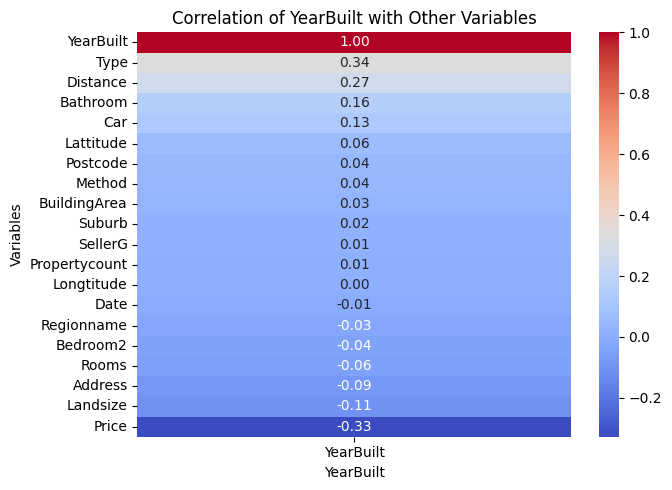

In [760]:
# Compute correlation matrix and visualize correlations with 'YearBuilt'
correlation_matrix_encoded = numeric_and_encoded_columns.corr()
plt.figure(figsize=(7, 5))
sns.heatmap(
    correlation_matrix_encoded[['YearBuilt']].sort_values(by='YearBuilt', ascending=False),
    annot=True, cmap='coolwarm', cbar=True, fmt=".2f"
)
plt.title('Correlation of YearBuilt with Other Variables')
plt.xlabel('YearBuilt')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()

As 'YearBuilt' does not correlate with any other variables over the threshold of 0.25 which would lead to impution with predictors that have a weak or no relationship with 'YearBuilt', and thus lead to values that are not meaningful or accurate. 

Hence, we proceed with other forms of imputation and check for variability across regions.

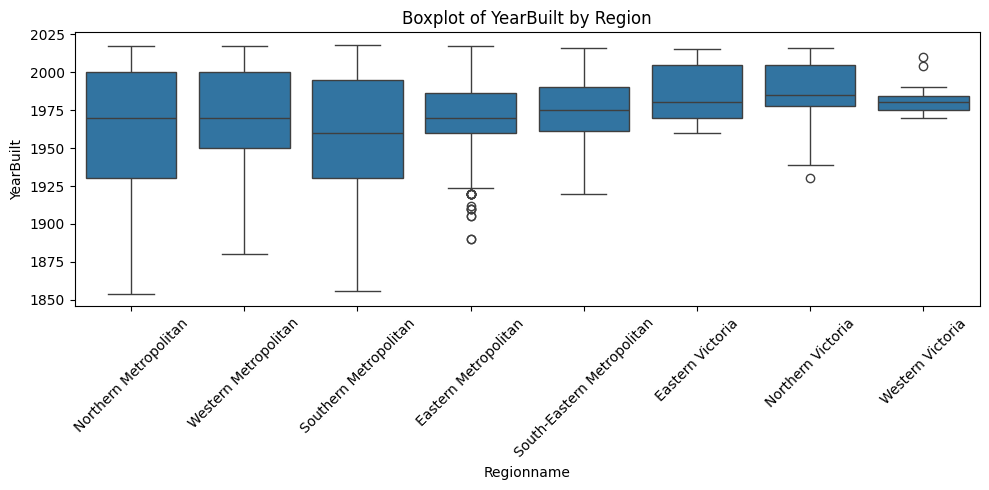

In [761]:
# Boxplot for YearBuilt by Region to check for vraince between the different Regions
plt.figure(figsize=(10, 5))
sns.boxplot(x='Regionname', y='YearBuilt', data=housing_data)
plt.xticks(rotation=45)
plt.title('Boxplot of YearBuilt by Region')
plt.xlabel('Regionname')
plt.ylabel('YearBuilt')
plt.tight_layout()
plt.show()

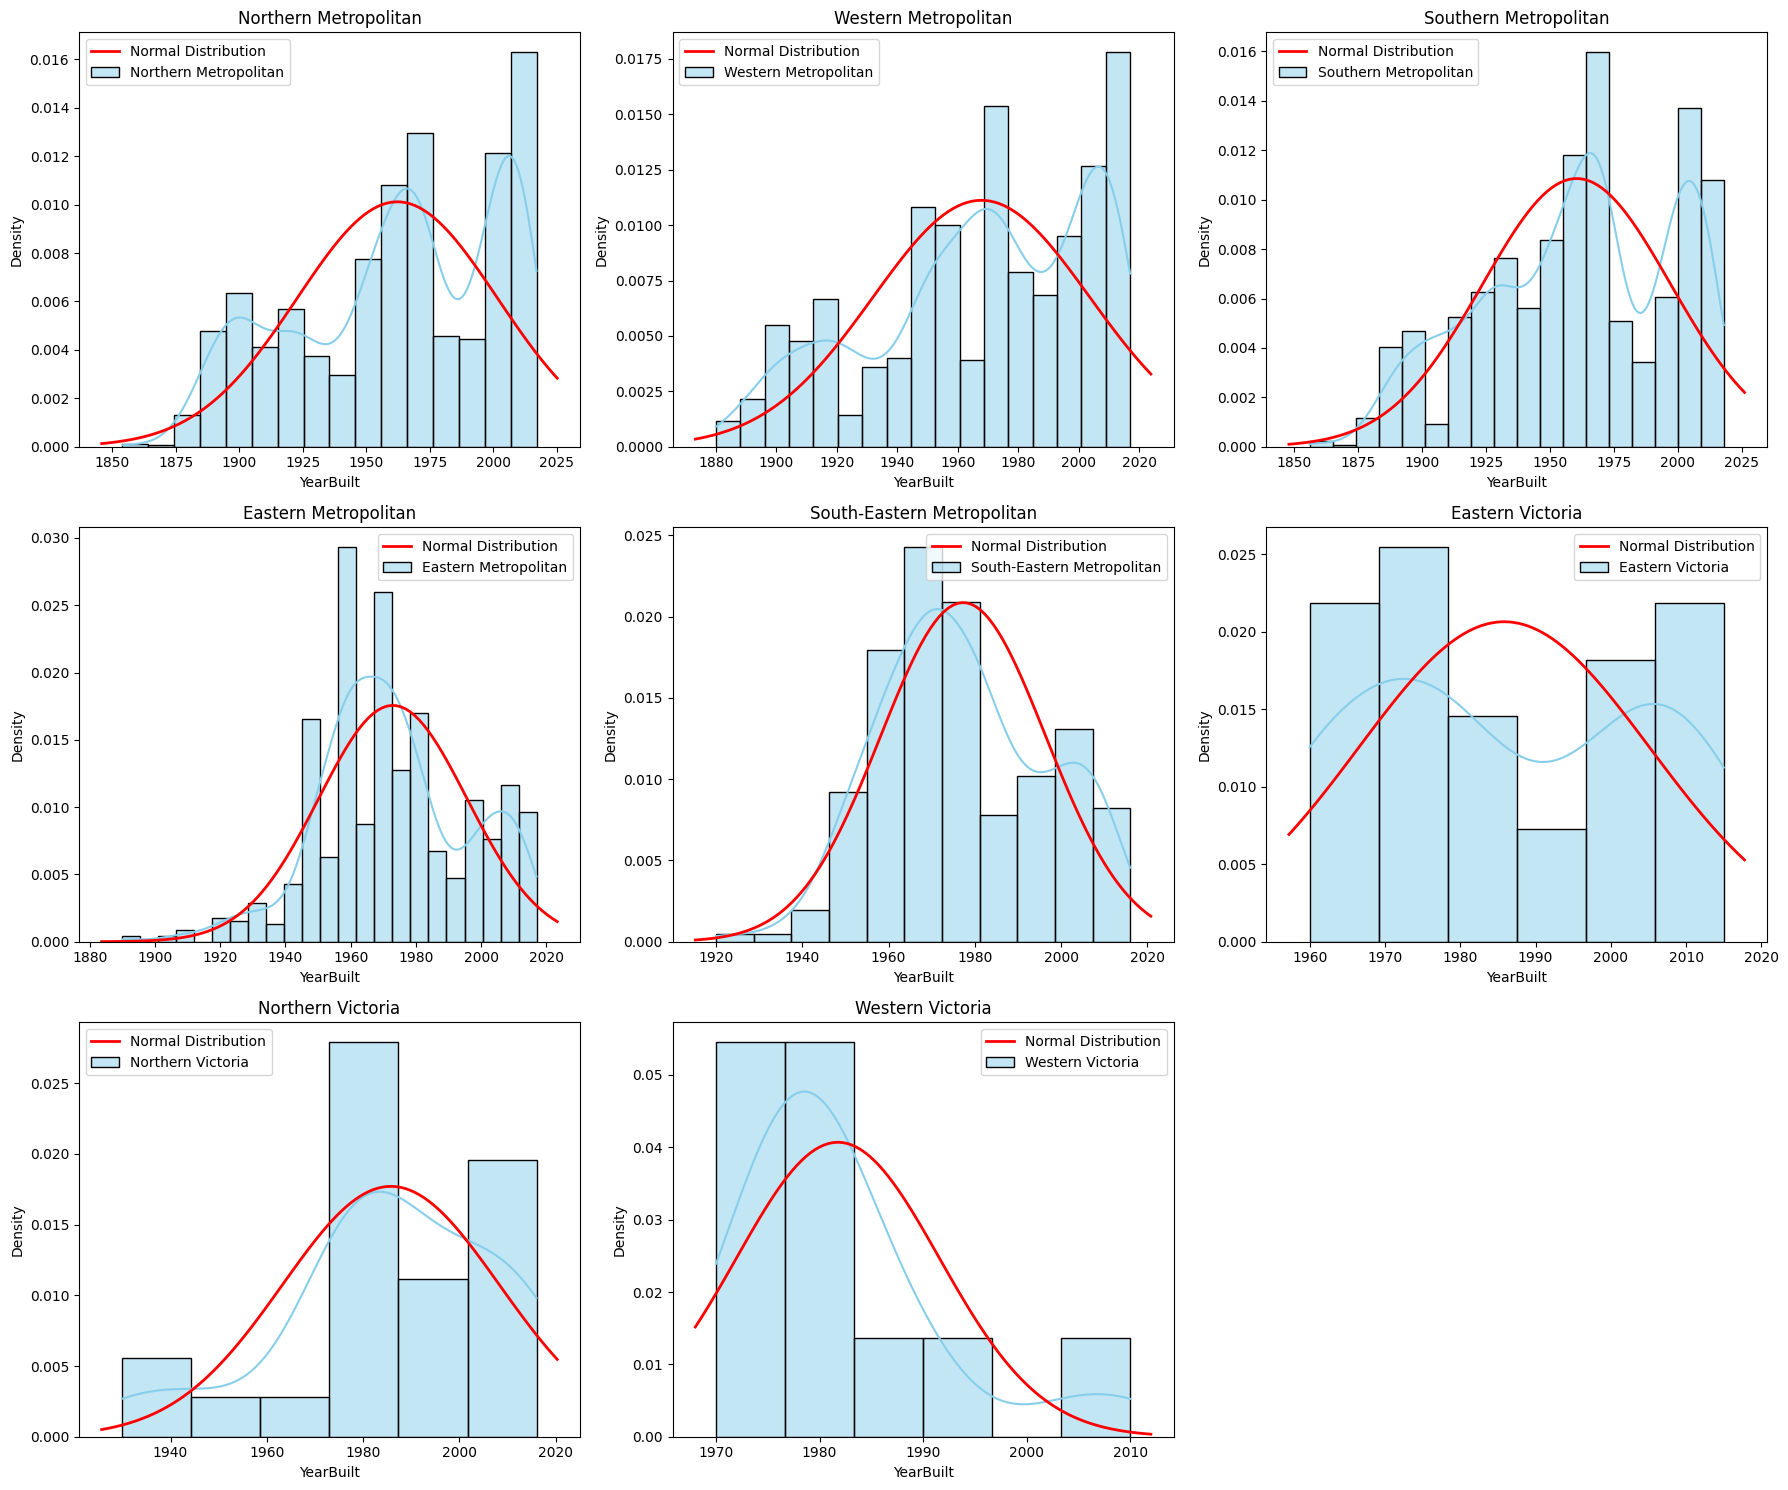

In [762]:
# Check if YearBuilt follows a Normal distirbution
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Group the data by 'Regionname' and prepare for subplots
regions = housing_data['Regionname'].unique()
num_regions = len(regions)

# Determine the number of rows and columns for subplots
rows = int(np.ceil(num_regions / 3))
cols = 3

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 5))
axes = axes.flatten()

for i, region in enumerate(regions):
    ax = axes[i]
    # Filter data for the specific region and drop missing YearBuilt values
    region_data = housing_data[housing_data['Regionname'] == region]['YearBuilt'].dropna()
    
    if region_data.empty:
        ax.set_title(f"{region} - No Data")
        ax.axis('off')
        continue

    # Plot histogram and normal distribution
    sns.histplot(region_data, kde=True, stat="density", color='skyblue', ax=ax, label=f"{region}")
    
    # Plot normal distribution
    mean = region_data.mean()
    std = region_data.std()
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean, std)
    ax.plot(x, p, 'r', linewidth=2, label="Normal Distribution")
    ax.set_title(f"{region}")
    ax.legend()

# Remove empty subplots if regions are fewer than rows * cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



We can see from the plots that 'YearBuilt' does not follow a normal distribution within each region. Thus we can not impute 'YearBuilt' by drawing at random from a normal distribution. As variability within the variable is still important, we sample directly sample from the existing observed values in each region. This method ensures that the imputed values align with the actual distribution of 'YearBuilt' within each region, regardless of its shape.

In [763]:
def random_impute_by_region(data, region_col, yearbuilt_col):
    # Iterate through each region
    for region in data[region_col].unique():
        # Filter non-missing values of YearBuilt for the current region
        region_data = data[data[region_col] == region][yearbuilt_col].dropna()
        
        # Check if there are non-missing values to sample from
        if not region_data.empty:
            # Count the number of missing values in YearBuilt for the current region
            missing_count = data[(data[region_col] == region) & (data[yearbuilt_col].isnull())].shape[0]
            
            # Randomly sample values from the existing distribution
            imputed_values = np.random.choice(region_data, missing_count, replace=True)
            
            # Fill the missing values with the sampled values
            data.loc[(data[region_col] == region) & (data[yearbuilt_col].isnull()), yearbuilt_col] = imputed_values

# Apply the function to the housing data
random_impute_by_region(housing_data, 'Regionname', 'YearBuilt')

# Check for remaining missing values
print("Remaining Missing Values in YearBuilt:")
print(housing_data['YearBuilt'].isnull().sum())


Remaining Missing Values in YearBuilt:
0


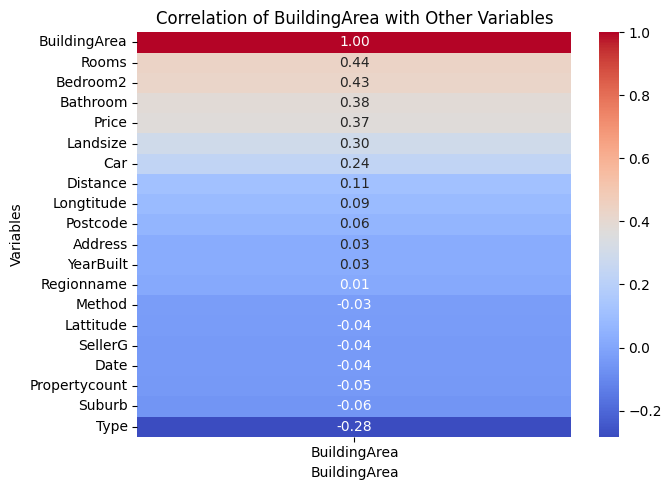

In [764]:
# Compute correlation matrix and visualize correlations with 'BuildingArea'
correlation_matrix_encoded = numeric_and_encoded_columns.corr()
plt.figure(figsize=(7, 5))
sns.heatmap(
    correlation_matrix_encoded[['BuildingArea']].sort_values(by='BuildingArea', ascending=False),
    annot=True, cmap='coolwarm', cbar=True, fmt=".2f"
)
plt.title('Correlation of BuildingArea with Other Variables')
plt.xlabel('BuildingArea')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()

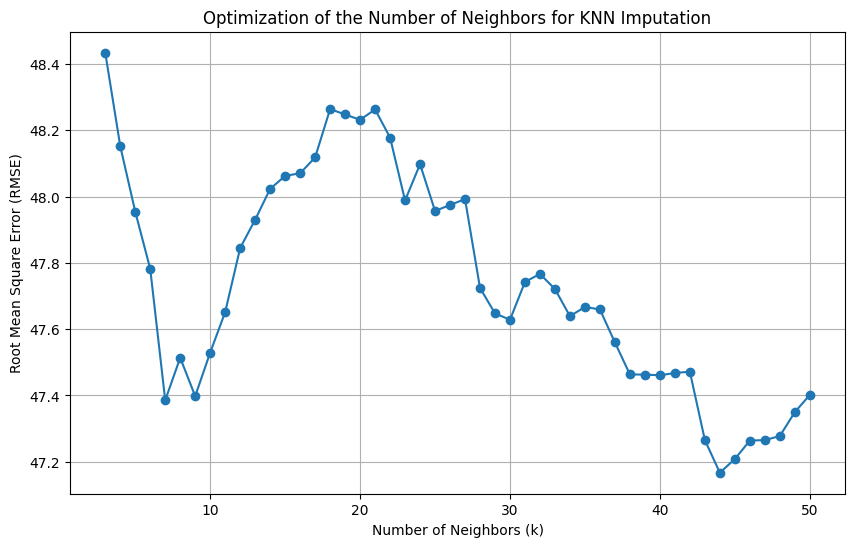

Optimal number of neighbors: 44


In [765]:
# Imputation of BuildingArea using KNN - using variables with a correlation of >= 0.25 (except price)
# Select relevant columns for testing imputation
columns_for_imputation = ['BuildingArea', 'Rooms', 'Bedroom2', 'Bathroom', 'Landsize', 'Type']
housing_data_encoded = housing_data.copy()

# Encode non-numeric columns
if 'Type' in columns_for_imputation:
    housing_data_encoded['Type'] = housing_data_encoded['Type'].astype('category').cat.codes

# Remove rows with missing values for testing
complete_data = housing_data_encoded.dropna(subset=columns_for_imputation)

# Split into train and test
train_data, test_data = train_test_split(complete_data, test_size=0.2, random_state=42)

# Introduce artificial missingness in the 'BuildingArea' column for testing
test_data_missing = test_data.copy()
mask = np.random.rand(len(test_data)) < 0.3  # Mask 30% of the values
test_data_missing.loc[mask, 'BuildingArea'] = np.nan

# Optimize n_neighbors
errors = []
n_neighbors_range = range(3, 51)

for k in n_neighbors_range:
    # Apply KNN imputation
    knn_imputer = KNNImputer(n_neighbors=k)
    imputed_data = knn_imputer.fit_transform(test_data_missing[columns_for_imputation])
    
    # Calculate error
    imputed_values = imputed_data[:, 0]  # Imputed 'BuildingArea'
    true_values = test_data['BuildingArea'].values
    error = root_mean_squared_error(true_values, imputed_values)
    errors.append(error)

# Plot errors to find the optimal n_neighbors
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_range, errors, marker='o')
plt.title("Optimization of the Number of Neighbors for KNN Imputation")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Root Mean Square Error (RMSE)")
plt.grid()
plt.show()

# Best n_neighbors
best_k = n_neighbors_range[np.argmin(errors)]
print(f"Optimal number of neighbors: {best_k}")



In [766]:
# Use KNN to impute BuildingArea based on variables with a correlation threshold of >= 0.25 (except Price)
# Select relevant columns for imputation
columns_for_imputation = ['BuildingArea', 'Rooms', 'Bedroom2', 'Bathroom', 'Landsize', 'Type']
housing_data_encoded = housing_data.copy()

# Encode non-numeric columns to include in KNN
if 'Type' in columns_for_imputation:
    housing_data_encoded['Type'] = housing_data_encoded['Type'].astype('category').cat.codes

# Apply KNN imputation to selected columns
knn_imputer = KNNImputer(n_neighbors=best_k)
imputed_data = knn_imputer.fit_transform(housing_data_encoded[columns_for_imputation])

# Update the original DataFrame with imputed values
housing_data.loc[:, 'BuildingArea'] = imputed_data[:, 0]

# Check for remaining missing values in 'BuildingArea'
print("Remaining Missing Values in BuildingArea:")
print(housing_data['BuildingArea'].isnull().sum())


Remaining Missing Values in BuildingArea:
0


In [767]:
print("\nPost-Cleaning Missing Data:")
missing_data = housing_data.isnull().sum()
missing_percentage = (missing_data / len(housing_data)) * 100
missing_report = pd.DataFrame({'Missing Count': missing_data, 'Missing Percentage': missing_percentage})
print(missing_report[missing_report['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False))


Post-Cleaning Missing Data:
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []


In [768]:
# Check for invalid entires in Landsize (where Landsize = 0)
landsizes_equal_zero = (housing_data['Landsize'] == 0).sum()
print(f"Number of Landsize values equal to 0: {landsizes_equal_zero}")

Number of Landsize values equal to 0: 1937


In [769]:
# Update Landsize to be equal to BuildingArea where Landsize is 0
housing_data.loc[housing_data['Landsize'] == 0, 'Landsize'] = housing_data['BuildingArea']
housing_data[['BuildingArea', 'Landsize']]

,BuildingArea,Landsize
0,118.675000,202.0
1,79.000000,156.0
2,150.000000,134.0
3,98.886364,94.0
4,142.000000,120.0
...,...,...
13202,200.896591,652.0
13203,133.000000,333.0
13204,163.000000,436.0
13205,157.000000,866.0


In [770]:
# Dropping unnecessary columns
columns_to_drop = ['Land_price_per_m2', 'Building_and_land_price_per_m2']
housing_data = housing_data.drop(columns=columns_to_drop, errors='ignore')

In [771]:
housing_data.to_csv('OFFICIAL_cleaned_data_without_outliers.csv', index=False)